# Loan Trader Demonstration

In [1]:
import Agents.Loan as Loan
import Agents.LoanInvestor as LoanInvestor
import Agents.LoanTrader as LoanTrader
import matplotlib.pyplot as plt

# Setting up a universe of loans and investors

The general goal here will be to demonstrate the process for a trade to clear step by step with a loan that the trader is holding for sale. 

### Creating the setup for loans to start trading

We will start with a universe in which there are a number of investors and a fewer number of loans

In [2]:
num_loans = 50
num_investors = 10


# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]
trader = LoanTrader.LoanTraderObj()

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)
    
# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

loans_for_sale = [loan for loan in loans_list if loan.current_owner == "no owner"]
loans_for_sale.extend([Loan.LoanObj() for _ in range(1)])

trader.update_loans_for_sale(loans_for_sale)

In [3]:
for investor in investors_list:
    investor.update(cycle = 1)

trader.run_auction(show_bids=True)

Investor I1b50 bids 99.6844177973112 for loan a2d81
Investor I7502 bids 99.68371142725978 for loan a2d81
Investor Ia690 bids 99.67376514697443 for loan a2d81
Investor Ida7f bids 99.6651025811778 for loan a2d81
Investor Ie3fc bids 99.65325566046678 for loan a2d81
Investor I3623 bids 99.66522563872617 for loan a2d81
Investor I9728 bids 99.64615178822321 for loan a2d81
Investor Iba8c bids 99.67371109810061 for loan a2d81
Investor Ide8b bids 99.68993606833054 for loan a2d81
Investor I2878 bids 99.63922772180359 for loan a2d81
Purchased:  True
Top bidder is Ide8b with bid price 99.68993606833054 for $785370.2692376017


# Looking at the Last Loan For Sale

In [4]:
loans_for_sale[-1].as_dict()

{'id': 'a2d81124-0b49-48d0-a53d-1611c38ddae8',
 'maturity': 48,
 'current_cycle': 0,
 'starting_cycle': 0,
 'ending_cycle': 48,
 'time_to_maturity': 48,
 'pd': 0.017523016897600902,
 'size': 787812.9931784536,
 'base_interest_rate': 0.002521778417092642,
 'interest_rate': 0.002521778417092642,
 'fair_value': 100.06027727754906,
 'market_price': 99.68993606833054,
 'current_owner': <Agents.LoanInvestor.LoanInvestorObj at 0x15f53d2d0>,
 'maturity_bool': False,
 'fair_value_history': [100.06027727754906],
 'market_price_history': [100.06027727754906, 99.68993606833054],
 'ownership_history': ['no owner',
  'T62796118-64e4-4d8c-beed-36d0103395ce',
  'Ide8b70a2-fd8d-4685-99bc-7459674f1790'],
 'sale_price_history': [None, 99.68993606833054],
 'reserve_price': 90.05424954979416,
 'defaulted': False}

## Trading Loans Between Investors
The trader will have the ability to collect the loans for sale from investors and then run an auction to sell the loans. We'll use a similar set up from above and a limited pool of investors as a demonstration.

In [5]:
num_loans = 1
num_investors = 500
trader = LoanTrader.LoanTraderObj(max_investors=500)


# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)
    
# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

In [6]:
for _ in range(100):     
    trader.collect_loans_for_sale(print_outputs=False, num_investors = 500)
    trader.run_auction(show_bids=False)

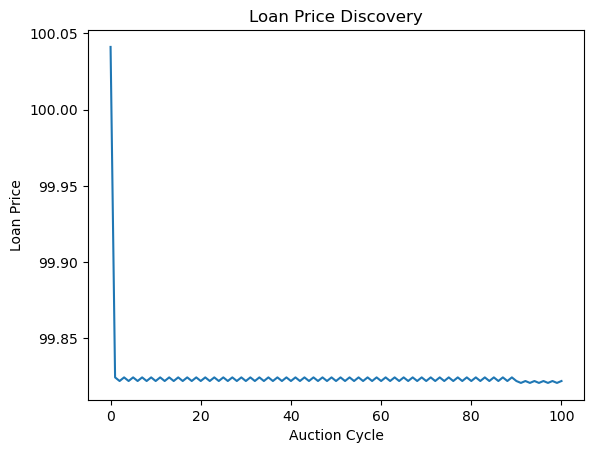

In [7]:
# plot to show loan price discovery in this universe of investors
plt.plot([loan.market_price_history for loan in loans_list][0])
plt.title("Loan Price Discovery")
plt.xlabel("Auction Cycle")
plt.ylabel("Loan Price")
plt.show()


From the plot above, we can see how there is eventially an ideal price that the loan will eventually reach after getting auctioned a number of times to match the most ideal investor for that particular loan based on it's score and the max bid. The idea of a reserve price allows this disovery to happen in a way that is not too costly for the originaly seller creating this slow decline type effect. 

## Adding in Multiple Loans

Below we see how price discovery becomes more complex for an individual loan when investors have a built portfolio. This is all under the assumption of a release at the initial cycle where no loans are updated until maturity. 

In [8]:
num_loans = 100
num_investors = 50
trader = LoanTrader.LoanTraderObj(max_investors=500)


# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj(target_score_param=0.2) for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)
    
# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

In [9]:
for _ in range(100):     
    trader.collect_loans_for_sale(print_outputs=False, num_investors = 25)
    trader.run_auction(show_bids=False)

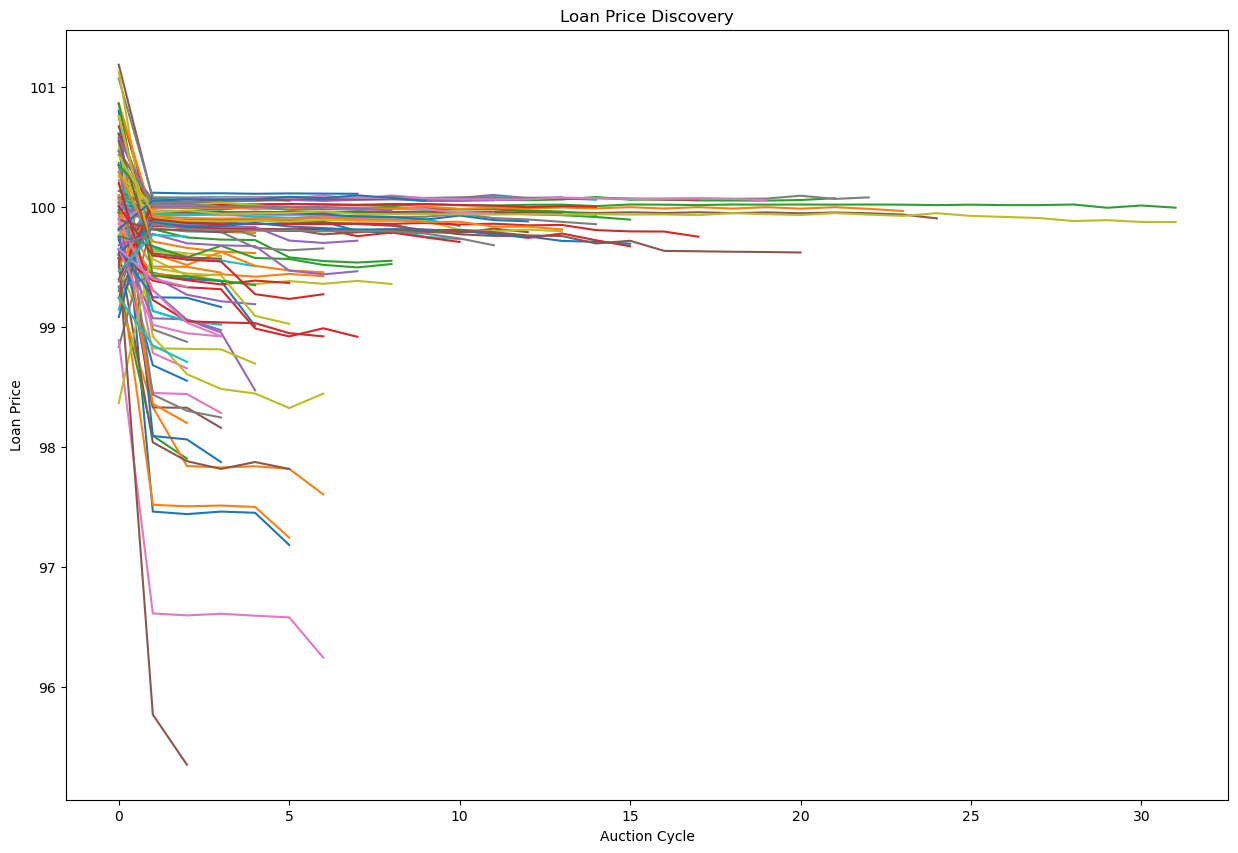

In [10]:
# Plotting
plt.figure(figsize=(15, 10))

# Plot each sublist as a separate line in the line plot
for i, sublist in enumerate([loan.market_price_history for loan in loans_list]):
    plt.plot(sublist, label=f'Series {i+1}')

plt.title("Loan Price Discovery")
plt.xlabel("Auction Cycle")
plt.ylabel("Loan Price")
plt.show()

### Adding in Loan Updates

This is the most basic implementation of the entire loan market in which prices are discovered and loans are able to mature. In this case there is only one trader and 1000 loans across 25 investors. The plot below shows how the market price for loans changes over the course of the simulation. The market price is reflected as the most recent high bid for a loan that goes up for sale. 

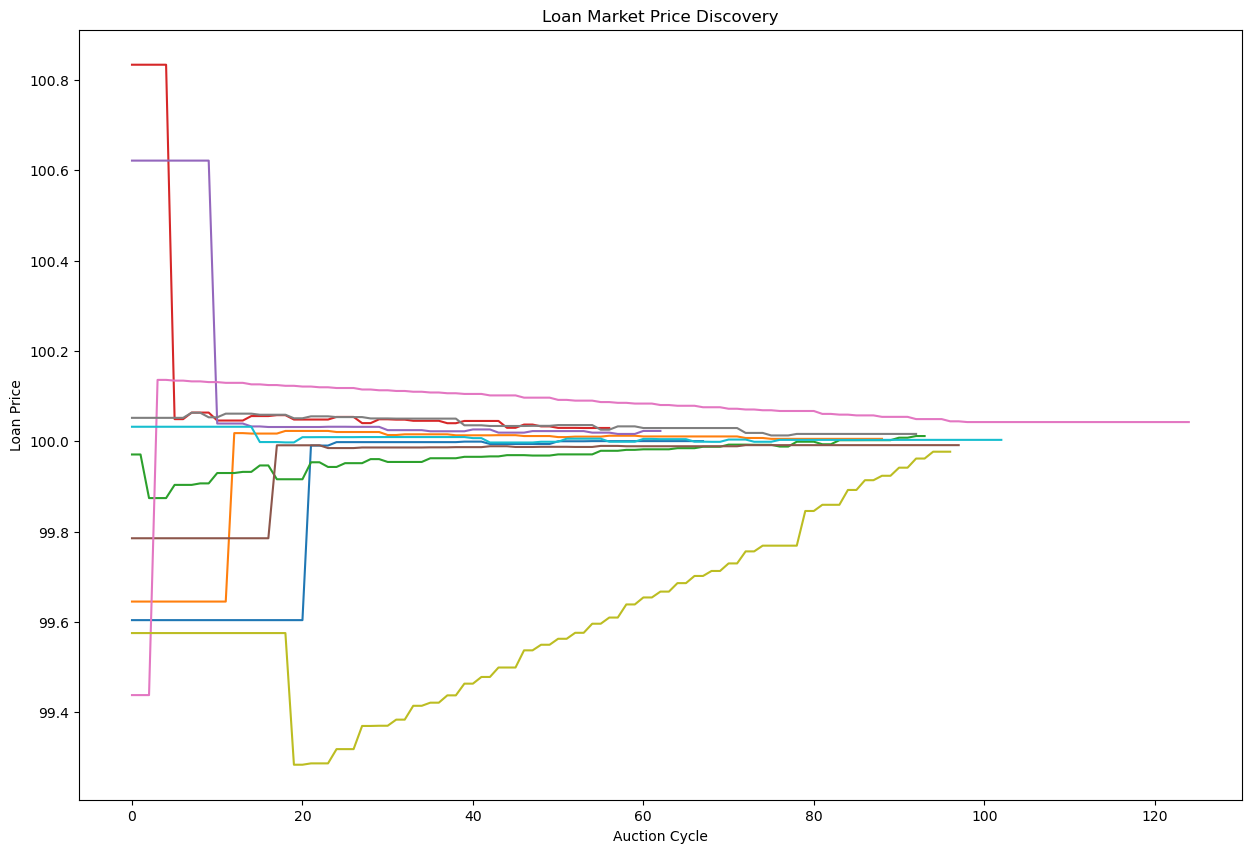

In [11]:
import Agents.Loan

num_loans = 10
num_investors = 25
trader = LoanTrader.LoanTraderObj(max_investors=500)

# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)

# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)
for _ in range(200):
    for investor in investors_list:
        investor.update(cycle=_)
    for loan in loans_list:
        loan.update(current_cycle=_)
    
    trader.update(cycle=_, num_investors=25)

# Plotting
plt.figure(figsize=(15, 10))

# plotting each loans market price history
for loan in loans_list:
    plt.plot(loan.market_price_history)

plt.title("Loan Market Price Discovery")
plt.xlabel("Auction Cycle")
plt.ylabel("Loan Price")
plt.show()

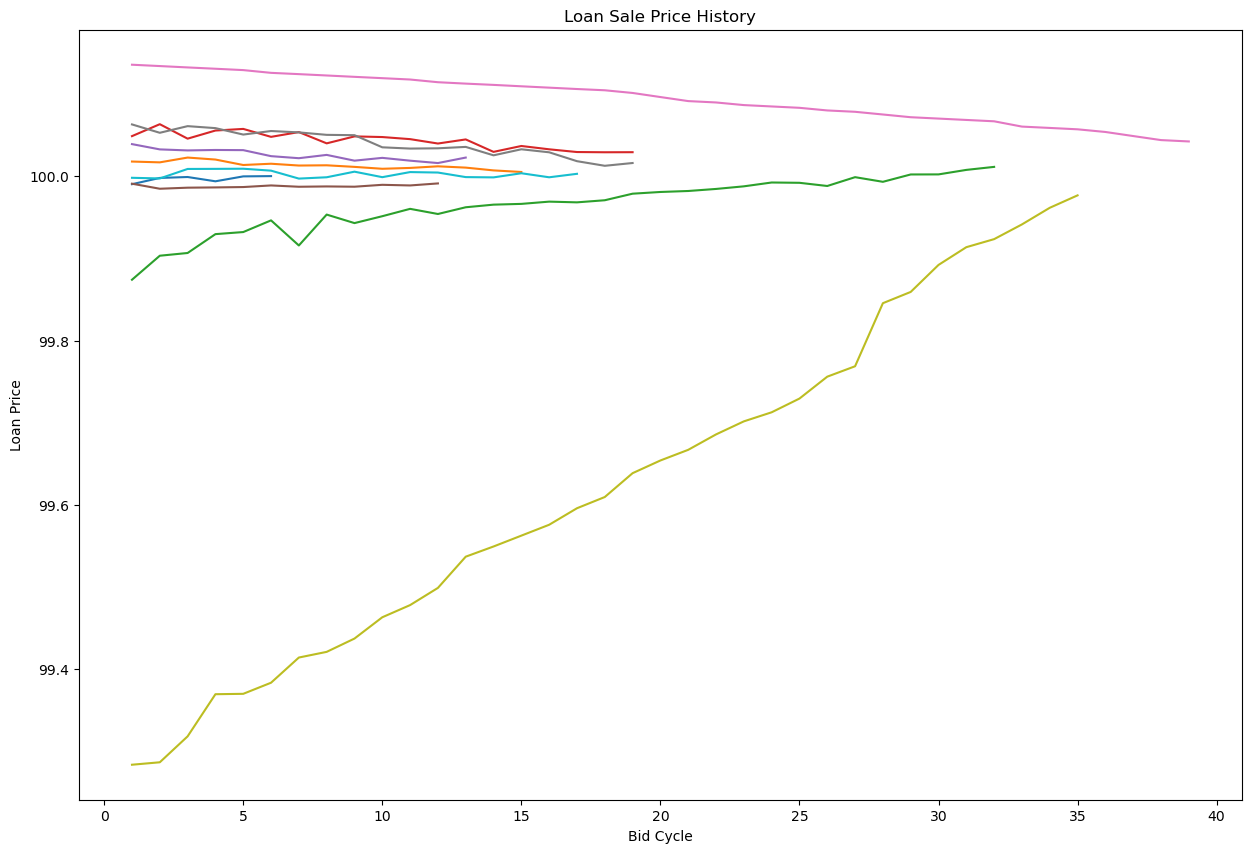

In [12]:
# Generating a plot similar to the above but for sale price history

plt.figure(figsize=(15, 10))
for i, sublist in enumerate([loan.sale_price_history for loan in loans_list]):
    plt.plot(sublist, label=f'Series {i + 1}')

plt.title("Loan Sale Price History")
plt.xlabel("Bid Cycle")
plt.ylabel("Loan Price")
plt.show()


## Capital Generation Across Updates with Trading

Text(0, 0.5, 'Revenue')

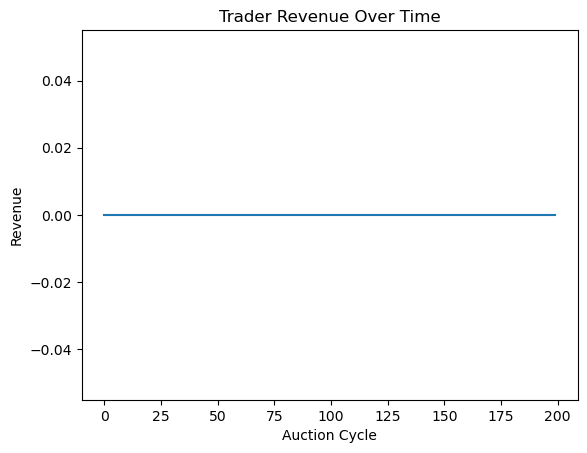

In [13]:
num_loans = 1000
num_investors = 100
trader = LoanTrader.LoanTraderObj(max_investors=100)

# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)

# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

trader_revenue = []

for _ in range(200):
    for investor in investors_list:
        investor.update(cycle=_)
    for loan in loans_list:
        loan.update(current_cycle=_)
        
    trader_revenue.append(sum(trader.revenue_history))

    trader.update(cycle=_, num_investors=25)

plt.plot(trader_revenue, label="Trader Revenue")
plt.title("Trader Revenue Over Time")
plt.xlabel("Auction Cycle")
plt.ylabel("Revenue")

Text(0, 0.5, 'Capital')

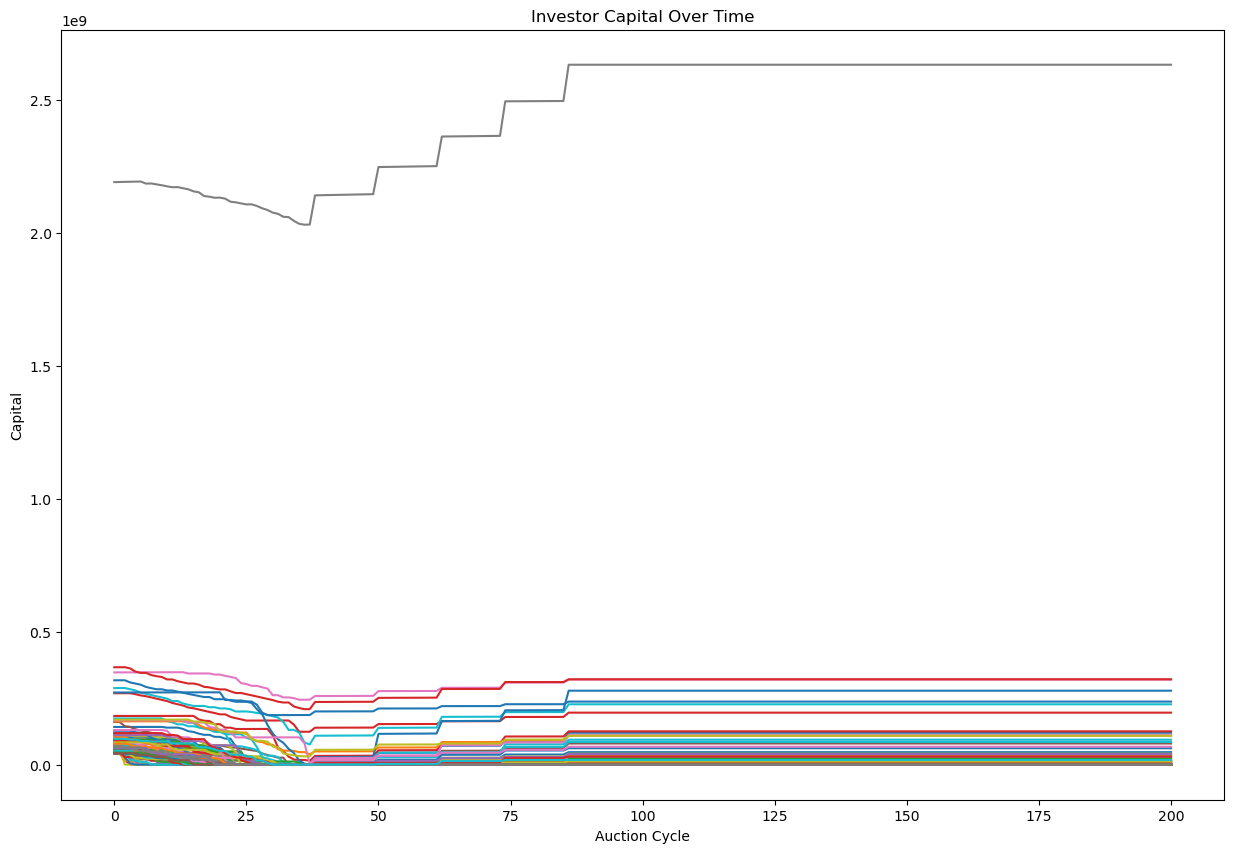

In [14]:
# Plotting
plt.figure(figsize=(15, 10))

# plotting each investors capital history
for investor in investors_list:
    plt.plot(investor.capital_history)
plt.title("Investor Capital Over Time")
plt.xlabel("Auction Cycle")
plt.ylabel("Capital")